In [1]:
import cftime 
import nc_time_axis
import xarray as xr
import gcgridobj 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from concurrent.futures import ProcessPoolExecutor
from src import utils
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

In [2]:
# List of CESM2-SSP2-4.5 Ensemble Members
ssp2_members = ['001', '002', '003', '004', '005', 
           '006', '007', '008', '009', '010', 
           '011', '012', '013', '014', '015', 
            '016']

# List of CESM2-SSP5-8.5 Ensemble Members
ssp5_members = ['001', '002', '003', '004', '005', 
           '006', '007', '008', '009', '010', 
           '011', '012', '013', '014', '015']

In [3]:
# Corresponding List of CESM2-SSP2-7.0 Ensemble Members
# Documentation: https://www2.cesm.ucar.edu/working_groups/CVC/simulations/cesm2-ssp245.html
# Documentation: https://www2.cesm.ucar.edu/working_groups/CVC/simulations/cesm2-ssp585.html

# SSP3 100 members corresponding to SSP2 16 members
ssp3_members_for_ssp2 = ['LE2-1231.011',
           'LE2-1231.012',
           'LE2-1231.013',
           'LE2-1231.014',
           'LE2-1231.015',
           'LE2-1231.016',
           'LE2-1231.017',
           'LE2-1231.018',
           'LE2-1251.012',
           'LE2-1251.013',
           'LE2-1251.014',
           'LE2-1251.015',
           'LE2-1251.016',
           'LE2-1251.017',
           'LE2-1251.018',
           'LE2-1251.011']

# SSP3 100 members corresponding to SSP5 16 members
ssp3_members_for_ssp5 = ['LE2-1011.001',
           'LE2-1031.002',
           'LE2-1051.003',
           'LE2-1071.004',
           'LE2-1091.005',
           'LE2-1111.006',
           'LE2-1131.007',
           'LE2-1151.008',
           'LE2-1171.009',
           'LE2-1191.010',
           'LE2-1251.011',
           'LE2-1251.012',
           'LE2-1251.013',
           'LE2-1251.014',
           'LE2-1251.015']


In [4]:
SST_dir = "/net/fs01/data/CESM2_projects/CESM2_SSP5-8.5/atm/monthly_ave/SST/"
PRECT_dir = "/net/fs01/data/CESM2_projects/CESM2_SSP5-8.5/atm/monthly_ave/PRECT/"
SST_pattern = "b.e21.*.f09_g17.CESM2-LE.{}.cam.h0.SST.*.nc"
PRECT_pattern = "b.e21.*.f09_g17.CESM2-LE.{}.cam.h0.PRECT.*.nc"

In [5]:
# Open SSP2 SST and PRECT data
def process_member(ens):
    print(f"Processing {ens}")
    ssp2_sst = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM2_SSP2-4.5/{ens}.SST.Nino34.nc") #Montly Nino3.4 SSTs
    ssp2_prect = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM2_SSP2-4.5/{ens}.PRECT.MSEA.nc") #Montly MSEA PRECT
    return (ssp2_prect, ssp2_sst)
    
def main(members):
    ssp2_prect_list = []
    ssp2_sst_list = []
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(process_member, members))
    for result in results:
        ssp2_prect, ssp2_sst = result
        ssp2_prect_list.append(ssp2_prect)
        ssp2_sst_list.append(ssp2_sst)
    return ssp2_prect_list, ssp2_sst_list
  
ssp2_prect_list, ssp2_sst_list = main(ssp2_members)

Processing 001
Processing 002
Processing 003
Processing 004
Processing 005
Processing 006
Processing 007
Processing 008
Processing 009
Processing 010
Processing 011
Processing 012
Processing 013
Processing 014
Processing 015
Processing 016


In [6]:
# Open SSP5 SST and PRECT data
def process_member(ens):
    print(f"Processing {ens}")
    ssp5_sst = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM2_SSP5-8.5/{ens}.SST.Nino34.nc") #Montly Nino3.4 SSTs
    ssp5_prect = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM2_SSP5-8.5/{ens}.PRECT.MSEA.nc") #Montly MSEA PRECT
    return (ssp5_prect, ssp5_sst)
    
def main(members):
    ssp5_prect_list = []
    ssp5_sst_list = []
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(process_member, members))
    for result in results:
        ssp5_prect, ssp5_sst = result
        ssp5_prect_list.append(ssp5_prect)
        ssp5_sst_list.append(ssp5_sst)
    return ssp5_prect_list, ssp5_sst_list
  
ssp5_prect_list, ssp5_sst_list = main(ssp5_members)

Processing 001
Processing 002
Processing 003
Processing 004
Processing 005
Processing 006
Processing 007
Processing 008
Processing 009
Processing 010
Processing 011
Processing 012
Processing 013
Processing 014
Processing 015


In [7]:
# Open SSP3 SST and PRECT data corresponding to SSP2 members
def process_member(ens):
    print(f"Processing {ens}")
    ssp3_sst1 = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM-LE2_cropped_data/{ens}.SST.Nino34.nc")  #Montly Nino3.4 SSTs
    ssp3_prect1 = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM-LE2_cropped_data/{ens}.PRECT.MSEA.nc")  #Montly MSEA PRECT
    return (ssp3_prect1, ssp3_sst1)
    
def main(members):
    ssp3_prect_list1 = []
    ssp3_sst_list1 = []
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(process_member, members))
    for result in results:
        ssp3_prect1, ssp3_sst1 = result
        ssp3_prect_list1.append(ssp3_prect1)
        ssp3_sst_list1.append(ssp3_sst1)
    return ssp3_prect_list1, ssp3_sst_list1
  
ssp3_prect_list1, ssp3_sst_list1 = main(ssp3_members_for_ssp2)

Processing LE2-1231.011
Processing LE2-1231.012
Processing LE2-1231.013
Processing LE2-1231.014
Processing LE2-1231.015
Processing LE2-1231.016
Processing LE2-1231.017
Processing LE2-1231.018
Processing LE2-1251.012
Processing LE2-1251.013
Processing LE2-1251.014
Processing LE2-1251.015
Processing LE2-1251.016
Processing LE2-1251.017
Processing LE2-1251.018
Processing LE2-1251.011


In [8]:
# Open SSP3 SST and PRECT data corresponding to SSP5 members
def process_member(ens):
    print(f"Processing {ens}")
    ssp3_sst2 = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM-LE2_cropped_data/{ens}.SST.Nino34.nc")   #Montly Nino3.4 SSTs
    ssp3_prect2 = xr.open_dataset(f"/home/eleroy/proj-dirs/SEAM/data/analysis_data/CESM-LE2_cropped_data/{ens}.PRECT.MSEA.nc")  #Montly MSEA PRECT
    return (ssp3_prect2, ssp3_sst2)
    
def main(members):
    ssp3_prect_list2 = []
    ssp3_sst_list2 = []
    with ProcessPoolExecutor() as executor:
        results = list(executor.map(process_member, members))
    for result in results:
        ssp3_prect2, ssp3_sst2 = result
        ssp3_prect_list2.append(ssp3_prect2)
        ssp3_sst_list2.append(ssp3_sst2)
    return ssp3_prect_list2, ssp3_sst_list2
  
ssp3_prect_list2, ssp3_sst_list2 = main(ssp3_members_for_ssp5)

Processing LE2-1011.001
Processing LE2-1031.002
Processing LE2-1051.003
Processing LE2-1071.004
Processing LE2-1091.005
Processing LE2-1111.006
Processing LE2-1131.007
Processing LE2-1151.008
Processing LE2-1171.009
Processing LE2-1191.010
Processing LE2-1251.011
Processing LE2-1251.012
Processing LE2-1251.013
Processing LE2-1251.014
Processing LE2-1251.015


In [9]:
ssp2_prect_ds = xr.concat(ssp2_prect_list, dim='ensemble')
ssp2_sst_ds = xr.concat(ssp2_sst_list, dim='ensemble')

ssp3_prect_ds1 = xr.concat(ssp3_prect_list1, dim='ensemble')
ssp3_sst_ds1 = xr.concat(ssp3_sst_list1, dim='ensemble')

ssp5_prect_ds = xr.concat(ssp5_prect_list, dim='ensemble')
ssp5_sst_ds = xr.concat(ssp5_sst_list, dim='ensemble')

ssp3_prect_ds2 = xr.concat(ssp3_prect_list2, dim='ensemble')
ssp3_sst_ds2 = xr.concat(ssp3_sst_list2, dim='ensemble')


In [10]:
# Extract historical PRECT/SST from SSP3 folder
hist_prect_ds1 = ssp3_prect_ds1.sel(time=slice('1900','2014'))
hist_sst_ds1 = ssp3_sst_ds1.sel(time=slice('1900','2014')).isel(z_t=0, drop=True)

hist_prect_ds2 = ssp3_prect_ds2.sel(time=slice('1900','2014'))
hist_sst_ds2 = ssp3_sst_ds2.sel(time=slice('1900','2014')).isel(z_t=0, drop=True)

In [11]:
hist_sst_da1 = hist_sst_ds1['SST'].transpose('time','lat', 'lon', 'ensemble')
hist_sst_da2 = hist_sst_ds2['SST'].transpose('time','lat', 'lon', 'ensemble')

hist_prect_da1 = hist_prect_ds1['PRECT'].transpose('time','lat', 'lon', 'ensemble')
hist_prect_da2 = hist_prect_ds2['PRECT'].transpose('time','lat', 'lon', 'ensemble')

ssp2_sst_da = ssp2_sst_ds['SST'].transpose('time','lat', 'lon', 'ensemble')
ssp2_prect_da = ssp2_prect_ds['PRECT'].transpose('time','lat', 'lon', 'ensemble')

ssp5_sst_da = ssp5_sst_ds['SST'].transpose('time','lat', 'lon', 'ensemble')
ssp5_prect_da = ssp5_prect_ds['PRECT'].transpose('time','lat', 'lon', 'ensemble')

In [12]:
# Regrid SSP2 and SSP5 SSTs to match Historical
dst_grid = gcgridobj.latlontools.extract_grid(hist_sst_da1.to_dataset(name='SST'))
src_grid = gcgridobj.latlontools.extract_grid(ssp2_sst_da.to_dataset(name='SST'))
regridder = gcgridobj.regrid.gen_regridder(src_grid, dst_grid)

ssp2_sst_ds_regridded_list = []
ssp5_sst_ds_regridded_list = []

for i in range(16):
    print(i)
    ssp2_sst_ds_regridded = regridder(ssp2_sst_da.isel(ensemble=i))
    ssp2_sst_ds_regridded_list.append(ssp2_sst_ds_regridded)
    if i !=15:
        ssp5_sst_ds_regridded = regridder(ssp5_sst_da.isel(ensemble=i))
        ssp5_sst_ds_regridded_list.append(ssp5_sst_ds_regridded)

ssp2_sst_da_regridded = xr.DataArray(ssp2_sst_ds_regridded_list, 
        coords={ 'ensemble': hist_sst_da1.ensemble, 'time': ssp2_prect_da.time, 'lat': hist_sst_da1.lat, 'lon': hist_sst_da1.lon,},
        dims=['ensemble', 'time', 'lat', 'lon'])

ssp5_sst_da_regridded = xr.DataArray(ssp5_sst_ds_regridded_list, 
        coords={ 'ensemble': hist_sst_da2.ensemble, 'time': ssp5_prect_da.time, 'lat': hist_sst_da2.lat, 'lon': hist_sst_da2.lon,},
        dims=['ensemble', 'time', 'lat', 'lon'])

ssp2_sst_da_regridded = ssp2_sst_da_regridded.transpose('time','lat', 'lon', 'ensemble')
ssp5_sst_da_regridded = ssp5_sst_da_regridded.transpose('time','lat', 'lon', 'ensemble')


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [13]:
# Concatenate Historical and SSP2
ssp2_sst_da_regridded = ssp2_sst_da_regridded-255 # fix unit error
ssp5_sst_da_regridded = ssp5_sst_da_regridded-255 # fix unit error

hist_ssp2_sst_da = xr.concat([hist_sst_da1, ssp2_sst_da_regridded], dim='time')
hist_ssp2_prect_da = xr.concat([hist_prect_da1, ssp2_prect_da], dim='time')

hist_ssp5_sst_da = xr.concat([hist_sst_da2, ssp5_sst_da_regridded], dim='time')
hist_ssp5_prect_da = xr.concat([hist_prect_da2, ssp5_prect_da], dim='time')

In [14]:
hist_ssp2_sst_da

<xarray.DataArray 'SST' (time: 2412, lat: 10, lon: 50, ensemble: 16)>
array([[[[  29.44254684,   28.48811913,   29.15696526, ...,
            27.55858612,   29.25311852,   29.46990776],
         [  29.31320763,   28.38303185,   29.0475502 , ...,
            27.49110985,   29.18692398,   29.40797615],
         [  29.20654678,   28.30471039,   28.94443512, ...,
            27.38590622,   29.11080933,   29.3423214 ],
         ...,
         [  27.23804283,   26.41205597,   26.07924652, ...,
            25.30526161,   26.13305473,   26.8917923 ],
         [  27.21567154,   26.42643166,   26.05206871, ...,
            25.29155731,   26.13240814,   26.86040878],
         [  27.17281723,   26.44490623,   26.02794838, ...,
            25.28656387,   26.13955307,   26.83540154]],

        [[  28.98191643,   27.99078178,   28.71394348, ...,
            26.97498131,   28.87471008,   29.15124893],
         [  28.85792351,   27.85544395,   28.59935951, ...,
            26.90607071,   28.79671478,   29.09007835],
         [  28.75870323,   27.74972534,   28.48324394, ...,
            26.78345299,   28.71820259,   29.03436852],
...
         [  49.29266357,   49.94262695,   46.98968506, ...,
            49.76834106,   48.32052612,   50.12759399],
         [  49.22106934,   49.92422485,   47.03070068, ...,
            49.71078491,   48.32803345,   50.13195801],
         [  49.08859253,   49.93997192,   47.13363647, ...,
            49.66244507,   48.41427612,   50.13012695]],

        [[-122.60159302, -122.27159119, -123.4128418 , ...,
          -122.53372192, -122.89311218, -122.38972473],
         [-122.60720825, -122.30683899, -123.48278809, ...,
          -122.54252625, -122.92340088, -122.36238098],
         [-122.62042236, -122.34971619, -123.5369873 , ...,
          -122.55351257, -122.94868469, -122.35018921],
         ...,
         [-123.21707153, -122.91278076, -124.1199646 , ...,
          -123.03233337, -123.59133911, -122.85430908],
         [-123.24212646, -122.91993713, -124.11300659, ...,
          -123.05476379, -123.58085632, -122.85787964],
         [-123.27207947, -122.90562439, -124.07969666, ...,
          -123.07051086, -123.54025269, -122.85572815]]]])
Coordinates:
  * time      (time) object 1900-01-15 00:00:00 ... 2100-12-15 00:00:00
  * lat       (lat) float64 -4.221 -3.221 -2.221 -1.221 ... 2.779 3.779 4.779
  * lon       (lon) float64 190.0 191.0 192.0 193.0 ... 236.0 237.0 238.0 239.0
  * ensemble  (ensemble) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15

In [15]:
# From montly data (already cropped to Nino34 and MSEA regions), get DJF SSTs in the Nino3.4 region and MAM PRECT in the MSEA region
# Input to the utils functions need to be datasets, not dataarrays 

# SSP2
sst_anm1 = utils.get_model_sst_anomalies(hist_ssp2_sst_da.to_dataset(name="SST"), detrend=False)
precip_anm1 = utils.get_model_precip_anomalies(hist_ssp2_prect_da.to_dataset(name="PRECT"), months=[3,4,5], detrend=False)

# SSP5
sst_anm2 = utils.get_model_sst_anomalies(hist_ssp5_sst_da.to_dataset(name="SST"), detrend=False)
precip_anm2 = utils.get_model_precip_anomalies(hist_ssp5_prect_da.to_dataset(name="PRECT"), months=[3,4,5], detrend=False)

In [16]:
# Get running 13-year correlations

N=13

lead_correlations1 = [] # SSP2
lead_correlations2 = [] # SSP5

for i in range(16):
    corr_lead1 = utils.get_running_corr(precip_anm1.isel(ensemble=i), sst_anm1.isel(ensemble=i).shift(time=1), window=N)
    lead_correlations1.append(corr_lead1)

    if i != 15:
        corr_lead2 = utils.get_running_corr(precip_anm2.isel(ensemble=i), sst_anm2.isel(ensemble=i).shift(time=1), window=N)
        lead_correlations2.append(corr_lead2)

In [17]:
lead_correlations_ds1 = xr.concat(lead_correlations1, dim='ensemble') # SSP2
lead_correlations_ds2 = xr.concat(lead_correlations2, dim='ensemble') # SSP5

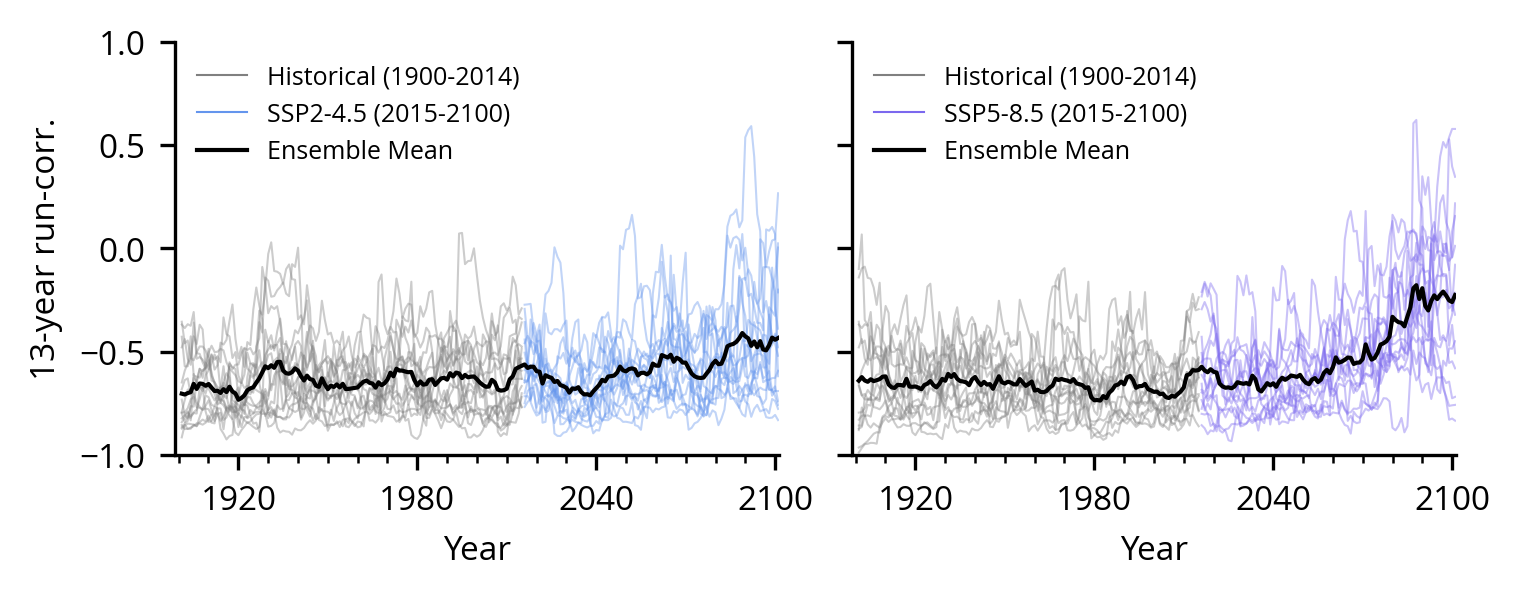

In [18]:
%matplotlib inline 

utils.set_matplotlib_font("Open Sans")
mpl.rcParams.update({
    'font.size': 8, 
    'axes.titlesize': 8, 
    'axes.labelsize': 8,
    'xtick.labelsize': 8, 
    'ytick.labelsize': 8, 
    'legend.fontsize': 8,
    'figure.titlesize': 8
})

fig_width_cm = 14
fig_height_cm = 5
fig_width_in = fig_width_cm / 2.54
fig_height_in = fig_height_cm / 2.54

fig = plt.figure(figsize=(fig_width_in, fig_height_in), dpi=300, constrained_layout=True)

gs1 = GridSpec(1, 2, top=0.90, bottom=0.2, hspace=0.5, wspace=0.12)

ax1 = fig.add_subplot(gs1[0, 0])
ax2 = fig.add_subplot(gs1[0, 1])

############## Figure S4a ##############
for ens in range(16):
    x = lead_correlations_ds1['corr'].isel(ensemble=ens)
    ax1.plot(
        x.time[:115],
        x.values[:115],
        linestyle='-',
        color='grey',
        alpha=0.4,
        linewidth=0.5,
    )
    ax1.plot(
        x.time[115:201],
        x.values[115:201],
        linestyle='-',
        color='cornflowerblue',
        alpha=0.4,
        linewidth=0.5,
    )

ensemble_mean = lead_correlations_ds1['corr'].mean(dim='ensemble')
ax1.plot(
        ensemble_mean.time,
        ensemble_mean,
        label="Ensemble Mean",
        linestyle='-',
        color='k',
        alpha=1,
        linewidth=1
    )
    
# For legend, create temporary lines that are made invisible
line1 = Line2D([0], [0], color='grey', linewidth=0.5, linestyle='-')
line2 = Line2D([0], [0], color='cornflowerblue', linewidth=0.5, linestyle='-')
line3 = Line2D([0], [0], color='k', linewidth=1, linestyle='-')

plt.gca().add_patch(line1)
plt.gca().add_patch(line2)
plt.gca().add_patch(line3)

ax1.legend([line1, line2, line3], ['Historical (1900-2014)', 'SSP2-4.5 (2015-2100)', 'Ensemble Mean'], loc='upper left', frameon=False, fontsize=6)

line1.set_visible(False)
line2.set_visible(False)
line3.set_visible(False)

############## Figure S4b ##############
for ens in range(15):
    x = lead_correlations_ds2['corr'].isel(ensemble=ens)
    ax2.plot(
        x.time[:115],
        x.values[:115],
        linestyle='-',
        color='grey',
        alpha=0.4,
        linewidth=0.5,
    )
    ax2.plot(
        x.time[115:201],
        x.values[115:201],
        linestyle='-',
        color='mediumslateblue',
        alpha=0.4,
        linewidth=0.5,
    )

ensemble_mean = lead_correlations_ds2['corr'].mean(dim='ensemble')
ax2.plot(
        ensemble_mean.time,
        ensemble_mean,
        label="Ensemble Mean",
        linestyle='-',
        color='k',
        alpha=1,
        linewidth=1
    )

# For legend, create temporary lines that are made invisible
line1 = Line2D([0], [0], color='grey', linewidth=0.5, linestyle='-')
line2 = Line2D([0], [0], color='mediumslateblue', linewidth=0.5, linestyle='-')
line3 = Line2D([0], [0], color='k', linewidth=1, linestyle='-')

plt.gca().add_patch(line1)
plt.gca().add_patch(line2)
plt.gca().add_patch(line3)

ax2.legend([line1, line2, line3], ['Historical (1900-2014)', 'SSP5-8.5 (2015-2100)', 'Ensemble Mean'], loc='upper left', frameon=False, fontsize=6)

line1.set_visible(False)
line2.set_visible(False)
line3.set_visible(False)

# Set common axes parameters
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_minor_locator(mpl.dates.YearLocator(base=10))
    ax.set_xlim(-37000,37000)
    ax.set_ylim(-1,1)
    ax.set_xlabel("Year", fontsize=8)
    ax.tick_params(axis='both', which='major', labelsize=8)  # Set tick params for ax1

ax1.set_ylabel("13-year run-corr.", fontsize=8)
ax2.set_ylabel(None)
ax2.set_yticklabels([])

plt.savefig("FigS4.png")